## Analyzing IPL Auction Data

In [1]:
import numpy as np
import pandas as pd

In [5]:
pd.read_csv?

In [6]:
ipl_auc_df = pd.read_csv('IPL IMB381IPL2013.csv')

type(ipl_auc_df)

pandas.core.frame.DataFrame

In [9]:
ipl_auc_df.head()

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,...,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE
0,1,"Abdulla, YA",2,SA,KXIP,Allrounder,0,0,0,0.00,...,0.00,0,307,15,20.47,8.90,13.93,2009,50000,50000
1,2,Abdur Razzak,2,BAN,RCB,Bowler,214,18,657,71.41,...,0.00,0,29,0,0.00,14.50,0.00,2008,50000,50000
2,3,"Agarkar, AB",2,IND,KKR,Bowler,571,58,1269,80.62,...,121.01,5,1059,29,36.52,8.81,24.90,2008,200000,350000
3,4,"Ashwin, R",1,IND,CSK,Bowler,284,31,241,84.56,...,76.32,0,1125,49,22.96,6.23,22.14,2011,100000,850000
4,5,"Badrinath, S",2,IND,CSK,Batsman,63,0,79,45.93,...,120.71,28,0,0,0.00,0.00,0.00,2011,100000,800000


In [10]:
ipl_auc_df.tail()

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,...,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE
125,126,"Yadav, AS",2,IND,DC,Batsman,0,0,0,0.00,...,125.64,2,0,0,0.00,0.00,0.00,2010,50000,750000
126,127,Younis Khan,2,PAK,RR,Batsman,6398,7,6814,75.78,...,42.85,0,0,0,0.00,0.00,0.00,2008,225000,225000
127,128,Yuvraj Singh,2,IND,KXIP+,Batsman,1775,9,8051,87.58,...,131.88,67,569,23,24.74,7.02,21.13,2011,400000,1800000
128,129,Zaheer Khan,2,IND,MI+,Bowler,1114,288,790,73.55,...,91.67,1,1783,65,27.43,7.75,21.26,2008,200000,450000
129,130,"Zoysa, DNT",2,SL,DC,Bowler,288,64,343,95.81,...,122.22,0,99,2,49.50,9.00,33.00,2008,100000,110000


In [11]:
ipl_auc_df.head().transpose()

,0,1,2,3,4
Sl.NO.,1,2,3,4,5
PLAYER NAME,"Abdulla, YA",Abdur Razzak,"Agarkar, AB","Ashwin, R","Badrinath, S"
AGE,2,2,2,1,2
COUNTRY,SA,BAN,IND,IND,IND
TEAM,KXIP,RCB,KKR,CSK,CSK
PLAYING ROLE,Allrounder,Bowler,Bowler,Bowler,Batsman
T-RUNS,0,214,571,284,63
T-WKTS,0,18,58,31,0
ODI-RUNS-S,0,657,1269,241,79
ODI-SR-B,0,71.41,80.62,84.56,45.93


### Finding Summary of the DataFrame

In [12]:
ipl_auc_df.columns

Index(['Sl.NO.', 'PLAYER NAME', 'AGE', 'COUNTRY', 'TEAM', 'PLAYING ROLE',
       'T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'CAPTAINCY EXP', 'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C',
       'WKTS', 'AVE-BL', 'ECON', 'SR-BL', 'AUCTION YEAR', 'BASE PRICE',
       'SOLD PRICE'],
      dtype='object')

In [13]:
ipl_auc_df.shape

(130, 26)

In [14]:
ipl_auc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sl.NO.         130 non-null    int64  
 1   PLAYER NAME    130 non-null    object 
 2   AGE            130 non-null    int64  
 3   COUNTRY        130 non-null    object 
 4   TEAM           130 non-null    object 
 5   PLAYING ROLE   130 non-null    object 
 6   T-RUNS         130 non-null    int64  
 7   T-WKTS         130 non-null    int64  
 8   ODI-RUNS-S     130 non-null    int64  
 9   ODI-SR-B       130 non-null    float64
 10  ODI-WKTS       130 non-null    int64  
 11  ODI-SR-BL      130 non-null    float64
 12  CAPTAINCY EXP  130 non-null    int64  
 13  RUNS-S         130 non-null    int64  
 14  HS             130 non-null    int64  
 15  AVE            130 non-null    float64
 16  SR-B           130 non-null    float64
 17  SIXERS         130 non-null    int64  
 18  RUNS-C    

### Slicing and Indexing a DataFrame

In [16]:
ipl_auc_df[25:30]

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,...,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE
25,26,"Ganguly, SC",3,IND,KKR+,Batsman,7212,32,11363,73.70,...,106.81,42,363,10,36.30,7.89,27.60,2011,200000,400000
26,27,"Gayle, CH",2,WI,KKR+,Allrounder,6373,72,8087,83.95,...,161.79,129,606,13,46.62,8.05,34.85,2008,250000,800000
27,28,"Gibbs, HH",3,SA,DC,Batsman,6167,0,8094,83.26,...,109.79,31,0,0,0.00,0.00,0.00,2008,250000,575000
28,29,"Gilchrist, AC",3,AUS,DC+,W. Keeper,5570,0,9619,96.94,...,140.21,86,0,0,0.00,0.00,0.00,2008,300000,700000
29,30,"Gony, MS",2,IND,CSK+,Bowler,0,0,0,0.00,...,117.39,5,999,30,33.30,8.47,23.60,2011,50000,290000


In [17]:
ipl_auc_df[-5:]

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,...,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE
125,126,"Yadav, AS",2,IND,DC,Batsman,0,0,0,0.00,...,125.64,2,0,0,0.00,0.00,0.00,2010,50000,750000
126,127,Younis Khan,2,PAK,RR,Batsman,6398,7,6814,75.78,...,42.85,0,0,0,0.00,0.00,0.00,2008,225000,225000
127,128,Yuvraj Singh,2,IND,KXIP+,Batsman,1775,9,8051,87.58,...,131.88,67,569,23,24.74,7.02,21.13,2011,400000,1800000
128,129,Zaheer Khan,2,IND,MI+,Bowler,1114,288,790,73.55,...,91.67,1,1783,65,27.43,7.75,21.26,2008,200000,450000
129,130,"Zoysa, DNT",2,SL,DC,Bowler,288,64,343,95.81,...,122.22,0,99,2,49.50,9.00,33.00,2008,100000,110000


In [19]:
# Selecting a particular column

ipl_auc_df['PLAYER NAME'][50:55]

50          Kohli, V
51          Kumar, P
52         Kumble, A
53    Langeveldt, CK
54       Laxman, VVS
Name: PLAYER NAME, dtype: object

In [20]:
# Selecting multiple columns
ipl_auc_df[['PLAYER NAME', 'COUNTRY']][:10]

,PLAYER NAME,COUNTRY
0,"Abdulla, YA",SA
1,Abdur Razzak,BAN
2,"Agarkar, AB",IND
3,"Ashwin, R",IND
4,"Badrinath, S",IND
5,"Bailey, GJ",AUS
6,"Balaji, L",IND
7,"Bollinger, DE",AUS
8,"Botha, J",SA
9,"Boucher, MV",SA


In [22]:
# Extract rows 4 thru 8 and columns 1 thru 3
ipl_auc_df.iloc[4:9, 1:4]

,PLAYER NAME,AGE,COUNTRY
4,"Badrinath, S",2,IND
5,"Bailey, GJ",2,AUS
6,"Balaji, L",2,IND
7,"Bollinger, DE",2,AUS
8,"Botha, J",2,SA


In [23]:
ipl_auc_df.head()

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,...,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE
0,1,"Abdulla, YA",2,SA,KXIP,Allrounder,0,0,0,0.00,...,0.00,0,307,15,20.47,8.90,13.93,2009,50000,50000
1,2,Abdur Razzak,2,BAN,RCB,Bowler,214,18,657,71.41,...,0.00,0,29,0,0.00,14.50,0.00,2008,50000,50000
2,3,"Agarkar, AB",2,IND,KKR,Bowler,571,58,1269,80.62,...,121.01,5,1059,29,36.52,8.81,24.90,2008,200000,350000
3,4,"Ashwin, R",1,IND,CSK,Bowler,284,31,241,84.56,...,76.32,0,1125,49,22.96,6.23,22.14,2011,100000,850000
4,5,"Badrinath, S",2,IND,CSK,Batsman,63,0,79,45.93,...,120.71,28,0,0,0.00,0.00,0.00,2011,100000,800000


In [24]:
ipl_auc_df['PLAYING ROLE'].unique()

array(['Allrounder', 'Bowler', 'Batsman', 'W. Keeper'], dtype=object)

In [25]:
pd.get_dummies(ipl_auc_df['PLAYING ROLE']) [:10]

,Allrounder,Batsman,Bowler,W. Keeper
0,1,0,0,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,1,0,0
5,0,1,0,0
6,0,0,1,0
7,0,0,1,0
8,1,0,0,0
9,0,0,0,1


In [33]:
x_features = ipl_auc_df.columns

x_features = ['PLAYER NAME']

y_features = ['TEAM', 'PLAYER ROLE']

In [34]:
# ipl_auc_encoded_df = pd.get_dummies(ipl_auc_df[x_features], columns=y_features)

# ipl_auc_encoded_df

In [35]:
ipl_auc_df.COUNTRY.value_counts()

IND    53
AUS    22
SA     16
SL     12
PAK     9
NZ      7
WI      6
ENG     3
BAN     1
ZIM     1
Name: COUNTRY, dtype: int64

In [36]:
ipl_auc_df.head()

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,...,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE
0,1,"Abdulla, YA",2,SA,KXIP,Allrounder,0,0,0,0.00,...,0.00,0,307,15,20.47,8.90,13.93,2009,50000,50000
1,2,Abdur Razzak,2,BAN,RCB,Bowler,214,18,657,71.41,...,0.00,0,29,0,0.00,14.50,0.00,2008,50000,50000
2,3,"Agarkar, AB",2,IND,KKR,Bowler,571,58,1269,80.62,...,121.01,5,1059,29,36.52,8.81,24.90,2008,200000,350000
3,4,"Ashwin, R",1,IND,CSK,Bowler,284,31,241,84.56,...,76.32,0,1125,49,22.96,6.23,22.14,2011,100000,850000
4,5,"Badrinath, S",2,IND,CSK,Batsman,63,0,79,45.93,...,120.71,28,0,0,0.00,0.00,0.00,2011,100000,800000


In [37]:
ipl_auc_df.AGE.value_counts()

2    86
3    28
1    16
Name: AGE, dtype: int64

In [38]:
# Crosstabulation

pd.crosstab(ipl_auc_df['AGE'], ipl_auc_df['PLAYING ROLE'])

PLAYING ROLE,Allrounder,Batsman,Bowler,W. Keeper
AGE,,,,
1,4,5,7,0
2,25,21,29,11
3,6,13,8,1


In [40]:
ipl_auc_df[['PLAYER NAME', 'SOLD PRICE']].sort_values('SOLD PRICE')[:10]

,PLAYER NAME,SOLD PRICE
73,"Noffke, AA",20000
46,Kamran Khan,24000
0,"Abdulla, YA",50000
1,Abdur Razzak,50000
118,Van der Merwe,50000
5,"Bailey, GJ",50000
85,"Pomersbach, LA",50000
34,"Henriques, MC",50000
61,"McDonald, AB",80000
78,Pankaj Singh,95000


In [41]:
ipl_auc_df[['PLAYER NAME', 'SOLD PRICE']].sort_values('SOLD PRICE', ascending=False)[:10]

,PLAYER NAME,SOLD PRICE
93,"Sehwag, V",1800000
127,Yuvraj Singh,1800000
50,"Kohli, V",1800000
111,"Tendulkar, SR",1800000
113,"Tiwary, SS",1600000
83,"Pietersen, KP",1550000
23,"Flintoff, A",1550000
15,"Dhoni, MS",1500000
108,"Symonds, A",1350000
110,"Taylor, LRPL",1000000


In [46]:
import matplotlib.pyplot as plt
import seaborn as sn

In [43]:
ipl_auc_df.groupby('AGE')['SOLD PRICE'].mean()

AGE
1    720250.000000
2    484534.883721
3    520178.571429
Name: SOLD PRICE, dtype: float64

In [45]:
meanSoldPriceByAge = ipl_auc_df.groupby('AGE')['SOLD PRICE'].mean().reset_index()

type(meanSoldPriceByAge)

pandas.core.frame.DataFrame

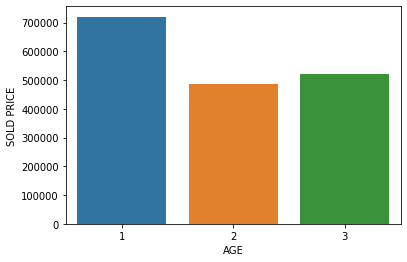

In [47]:
sn.barplot(x='AGE', y='SOLD PRICE', data=meanSoldPriceByAge)

In [49]:
avgSoldPriceByAgeRole = ipl_auc_df.groupby(['AGE', 'PLAYING ROLE'])['SOLD PRICE'].mean().reset_index()

type(avgSoldPriceByAgeRole)

pandas.core.frame.DataFrame

In [50]:
avgSoldPriceByAgeRole.head()

,AGE,PLAYING ROLE,SOLD PRICE
0,1,Allrounder,5.875000e+05
1,1,Batsman,1.110000e+06
2,1,Bowler,5.177143e+05
3,2,Allrounder,4.494000e+05
4,2,Batsman,6.547619e+05


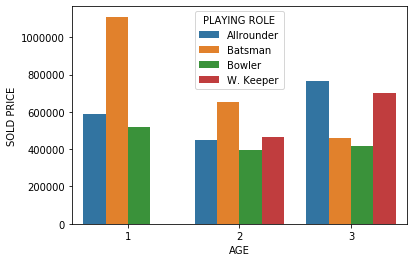

In [51]:
sn.barplot(x ='AGE', y='SOLD PRICE', hue='PLAYING ROLE', data = avgSoldPriceByAgeRole)

### Scatter Plot

In [52]:
ipl_batsman_df = ipl_auc_df[ipl_auc_df['PLAYING ROLE'] == 'Batsman']

In [53]:
ipl_batsman_df.columns

Index(['Sl.NO.', 'PLAYER NAME', 'AGE', 'COUNTRY', 'TEAM', 'PLAYING ROLE',
       'T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'CAPTAINCY EXP', 'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C',
       'WKTS', 'AVE-BL', 'ECON', 'SR-BL', 'AUCTION YEAR', 'BASE PRICE',
       'SOLD PRICE'],
      dtype='object')

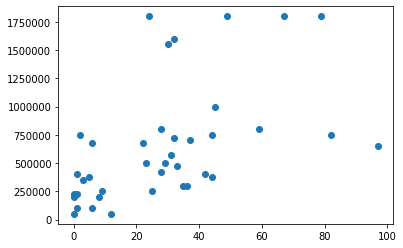

In [54]:
plt.scatter(x=ipl_batsman_df.SIXERS, y=ipl_batsman_df['SOLD PRICE'])